## **Nom:** NGUEPONWOUO JOSEPH-MARIE

# **Computer Problem Set 2.1 | The Black-Scholes hedging strategy**

Let $T>0$ be a fixed maturity. For a positive integer $n$, we denote $ΔT:= \frac{1}{n}$, $t_i:= iΔT$, $i=0,...,n$. We consider a Brownian motion $W$, and we introduce the process
$$
S_t := S_0 \ e^{(μ-\frac{σ^2}{2})t+σW_t} \ \ t\geq 0
$$
where $μ ∈ \mathbb R$ and $σ>0$ denote the drift and the volatility parameters.

1) Build a program which produces a sample of $N=1000$ copies of the
 discrete path {$S_{t_i}, i=0,...,1$}.

In [26]:
#Importation of libraries and variables initialisation
import numpy as np
import matplotlib.pyplot as plt
import numba

T = 1.5
S0 = 100
sigma = 0.3
r = 0.05
n_samples = 1000

In [27]:
@numba.njit("int32,float64")
def brownian(n, T):
    """
    This function computes the values of the Brownian (W_i)
    """
    dt = T/n
    Zi = dt**0.5*np.random.randn(n)
    res = np.zeros((n+1,))
    res[1:] = np.cumsum(Zi)
    return res

def process(n, T, mu, sigma, S0=100):
    """
    This function computes the values of (S_i)
    """
    t_vals = np.linspace(0, T, n+1, endpoint=True)
    Wt = brownian(n, T)
    exponents = (mu - 0.5*sigma*sigma)*t_vals+sigma*Wt
    return S0*np.exp(exponents)

Text(0, 0.5, 'Price $S_t$')

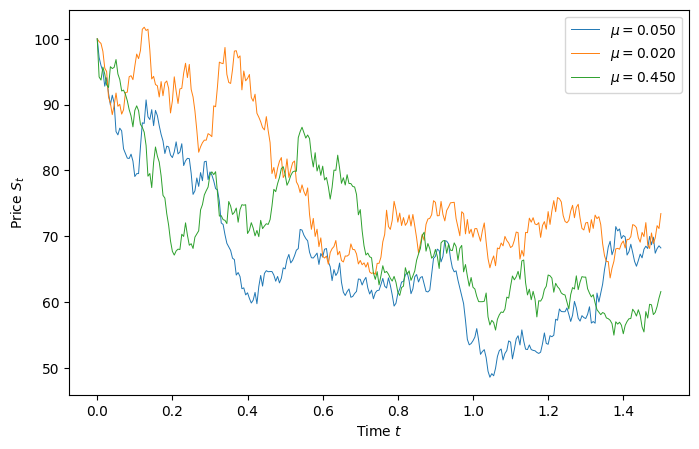

In [28]:
#We plot the S_t's values for different drifts mu with respect to the time t
n = 300
fig, ax = plt.subplots(1,1,figsize=(8,5),dpi=100)
t_vals = np.linspace(0, T, n+1, endpoint=True)
mu_val_list = [0.05, 0.02, 0.45]

sample_data = []

for mu in mu_val_list:
    sample_data.append([process(n, T, mu, sigma) for _ in range(n_samples)])
    graph_traj = sample_data[-1][0]
    ax.plot(t_vals, graph_traj, linewidth=0.7,
            label=r"$\mu = %.3f$" % mu)
sample_data = np.array(sample_data)
ax.legend()
ax.set_xlabel("Time $t$")
ax.set_ylabel("Price $S_t$")

- Compute the corresponding mean and variance

In [29]:
for i, mu in enumerate(mu_val_list):
    print("Drift value: %.3f" % mu)
    mean = np.mean(sample_data[i,:,-1])
    variance = np.var(sample_data[i,:,-1], ddof=1)
    print(" • sample mean $S_T$: %.4f" % mean)
    print(" • sample variance $S_T$: %.4f" % variance)

Drift value: 0.050
 • sample mean S_T: 108.8207
 • sample variance S_T: 1550.4654
Drift value: 0.020
 • sample mean S_T: 99.8717
 • sample variance S_T: 1339.8987
Drift value: 0.450
 • sample mean S_T: 193.7366
 • sample variance S_T: 5390.6761


**Comments:** Higher drift leads to a higher mean, but also a greater variance. This can be seen by writing:
$$
\mathbb E[S_T] = exp((\mu-\frac{\sigma^2}{2})T)\mathbb E[exp(\sigma W_T)]
$$
$$
\mathbb Var[S_T] = exp((2μ-σ^2)T \ \mathbb Var[exp(σW_T])
$$

2) (a) Simulate a sample of $N=1000$ copies of $X_T^n$ for each value of $μ$

In [30]:
from scipy.stats import norm as scnorm

In [31]:
#We start by defining a function that computes the Black-Scholes formula for given parameters
def bs_function(S0, K, T, sigma, r):
    s = S0
    k = K*np.exp(-r*T)
    v = sigma*sigma*T
    base = np.log(s/k)/np.sqrt(v)
    dm, dp = (base - 0.5*np.sqrt(v), base + 0.5*np.sqrt(v))
    return S0*scnorm.cdf(dp) - k*scnorm.cdf(dm)

We then define $Δ_t(K)$ according to model parameters:

In [32]:
def delta_function(S, K, T, t, sigma, r=0.05):
    """
    This function computes the value of the greek delta for different values of time
    """
    s = S0
    k = K*np.exp(-r*(T-t))
    v = sigma*sigma*(T-t)
    dp = np.log(s/k)/np.sqrt(v) + 0.5*np.sqrt(v)
    return scnorm.cdf(dp)

def xtn(n, T, K, S0, mu, sigma, r=0.05):
    """
    This function computes the value of the option's price
    """
    bs = bs_function(S0, K, T, sigma, r)
    t_vals = np.linspace(0, T, n+1, endpoint=True)
    t_vals_dec = t_vals[:-1]
    t_vals = t_vals[1:]
    deltas = delta_function(S0, K, T, t_vals_dec, sigma, r)
    St = process(n, T, mu, sigma, S0)
    St_dec = St[:-1]
    St = St[1:]
    res = bs + np.sum(deltas*(np.exp(-r*t_vals)*St - np.exp(-r*t_vals_dec)*St_dec), axis=0)
    return np.exp(r*T)*res

In [33]:
#Model parameters
t_vals = np.linspace(0, T, n+1, endpoint=True)
mu_val_list = [0.05, 0.02, 0.45]
K_val_list = list(range(80,121))

#Computation

n_samples = 1000

sample_data = []
for K in K_val_list:
    print("Computing samples for K=%.3f" % K)
    K_sample_data = []
    print("  Computing for mu = ",end='\t')
    for mu in mu_val_list:
        print("%.3f" % mu, end='\t')
        K_sample_data.append([xtn(n, T, K, S0, mu, sigma) for _ in range(n_samples)])
    print()
    sample_data.append(K_sample_data)

Computing samples for K=80.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=81.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=82.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=83.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=84.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=85.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=86.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=87.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=88.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=89.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=90.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=91.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=92.000
  Computing for mu = 	0.050	0.020	0.450	
Computing samples for K=93.000
  Computing for mu = 	0.050	0.020

In [34]:
# Make a numpy array out of our samples because it's easier to manipulate
sample_data = np.array(sample_data)

We will now compute the means over all 1000 samples for every value of
 $μ$ and $K$, and plot them:

In [35]:
mean_matrix = sample_data.mean(axis=2)

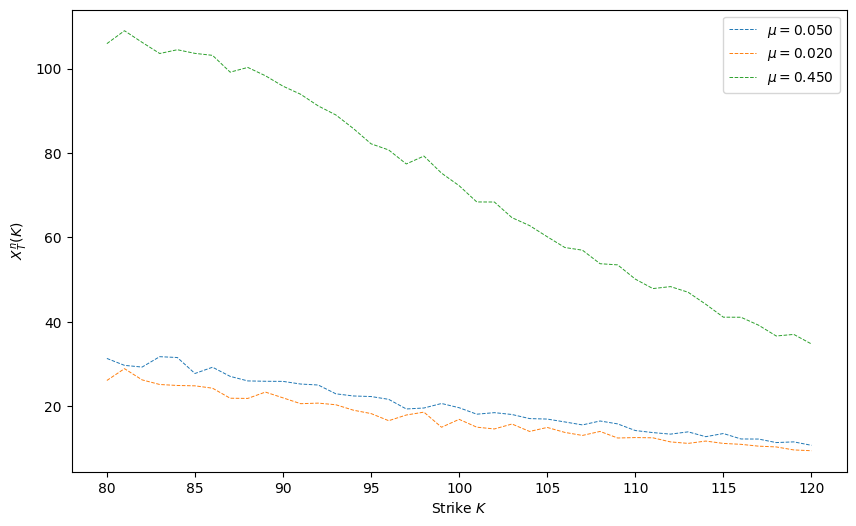

In [36]:
fig, ax = plt.subplots(1,1,figsize=(10,6),dpi=100)
ax.set_xlabel("Strike $K$")
ax.set_ylabel("$X_T^n(K)$")

for i, mu in enumerate(mu_val_list):
    ax.plot(K_val_list, mean_matrix[:,i], linestyle='--', label=r"$\mu=%.3f$" % mu, linewidth=0.7)

ax.legend()

**Comments:** We can see that higher values of the drift (which means higher mean asset price and variance at time $T$) lead to faster decrease of the portfolio value $X^n_T(K)$ with respect to the strike $K$, with higher starting value.

Indeed, higher drift means higher expected return on the asset at $T$ but with more uncertainty, and a higher strike will decrease the value more quickly.

(b) Compute the correxponding Profit and Loss

$$
PL_T^n(K):= X_T^n(K)-(S_T-K)^+
$$

In [37]:
def profit_loss(n, T, K, S0, mu, sigma, r=0.05):
    """
    We compute here the PnL of your strategy to see if we are finally making profit or not
    """
    bs = bs_function(S0, K, T, sigma, r)
    t_vals = np.linspace(0, T, n+1, endpoint=True)
    t_vals_dec = t_vals[:-1]
    t_vals = t_vals[1:]
    deltas = delta_function(S0, K, T, t_vals_dec, sigma, r)
    St = process(n, T, mu, sigma, S0)
    Sfinal = St[-1]
    St_dec = St[:-1]
    St = St[1:]
    res = bs + np.sum(deltas*(np.exp(-r*t_vals)*St - np.exp(-r*t_vals_dec)*St_dec), axis=0)
    res = np.exp(r*T)*res
    return res - max(0, Sfinal - K)

In [38]:
# Compute samples of the
n_samples = 1000
n_val_list = [128, 512, 1024, 2048]

pnl_sample_data = []
print("=== Profit and loss ===")
for n in n_val_list:
    print("Computing samples for n=%d" % n)
    n_sample_data = []
    for K in K_val_list:
        print("  for K=%.3f" % K, end='')
        K_sample_data = []
        for mu in mu_val_list:
            K_sample_data.append([profit_loss(n, T, K, S0, mu, sigma) for _ in range(n_samples)])
        print(' done')
        n_sample_data.append(K_sample_data)
    pnl_sample_data.append(n_sample_data)

=== Profit and loss ===
Computing samples for n=128
  for K=80.000 done
  for K=81.000 done
  for K=82.000 done
  for K=83.000 done
  for K=84.000 done
  for K=85.000 done
  for K=86.000 done
  for K=87.000 done
  for K=88.000 done
  for K=89.000 done
  for K=90.000 done
  for K=91.000 done
  for K=92.000 done
  for K=93.000 done
  for K=94.000 done
  for K=95.000 done
  for K=96.000 done
  for K=97.000 done
  for K=98.000 done
  for K=99.000 done
  for K=100.000 done
  for K=101.000 done
  for K=102.000 done
  for K=103.000 done
  for K=104.000 done
  for K=105.000 done
  for K=106.000 done
  for K=107.000 done
  for K=108.000 done
  for K=109.000 done
  for K=110.000 done
  for K=111.000 done
  for K=112.000 done
  for K=113.000 done
  for K=114.000 done
  for K=115.000 done
  for K=116.000 done
  for K=117.000 done
  for K=118.000 done
  for K=119.000 done
  for K=120.000 done
Computing samples for n=512
  for K=80.000 done
  for K=81.000 done
  for K=82.000 done
  for K=83.000 done

In [39]:
pnl_sample_data = np.array(pnl_sample_data)
print(pnl_sample_data.shape)

(4, 41, 3, 1000)


In [40]:
mean_matrix = np.mean(pnl_sample_data, axis=-1)
var_matrix = np.var(pnl_sample_data, axis=-1, ddof=1)

## Mean of the profit-loss

We plot the mean of $PL_T^n(K)$ against the strike and $n$, with different values of the drift $\mu$.

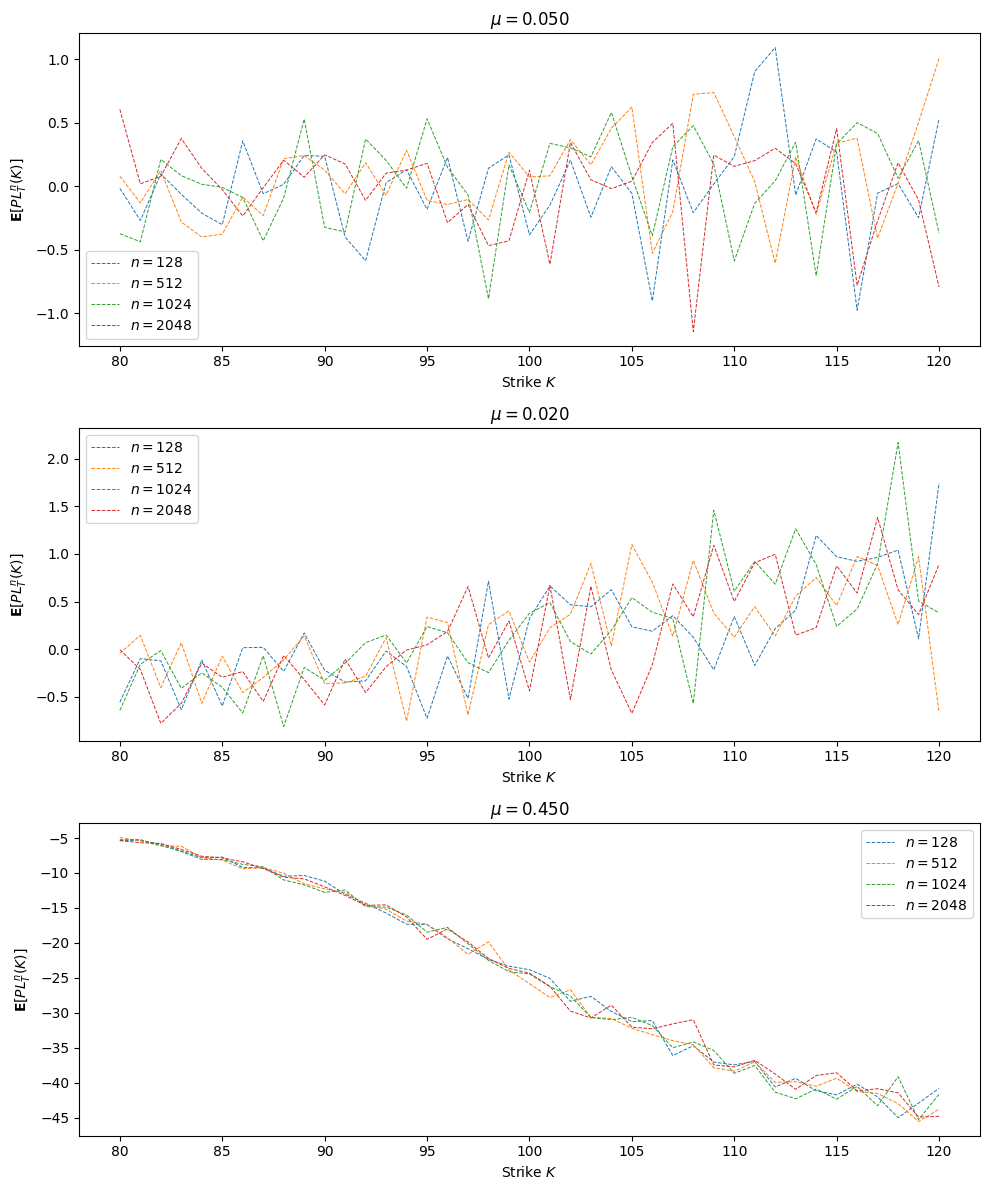

In [41]:
fig, axes = plt.subplots(3,1,figsize=(10,12),dpi=100)

for i, mu in enumerate(mu_val_list):
    for j, n in enumerate(n_val_list):
        axes[i].plot(
            K_val_list, mean_matrix[j,:,i],
            linestyle='--', label=r"$n=%d$" % n, linewidth=0.7)
    axes[i].set_xlabel("Strike $K$")
    axes[i].legend()
    axes[i].set_title(r"$\mu=%.3f$" % mu)
    axes[i].set_ylabel(r"$\mathbf{E}[PL_T^n(K)]$")
fig.tight_layout()

**Comments:** We again see the effect of the drift on the slope. The drift value $μ =  0.45$ has a huge impact on the expectation of the $PnL$. With this value, we release more and more losses as the strike values increases. But also that changing the simulation step doesn't change much.

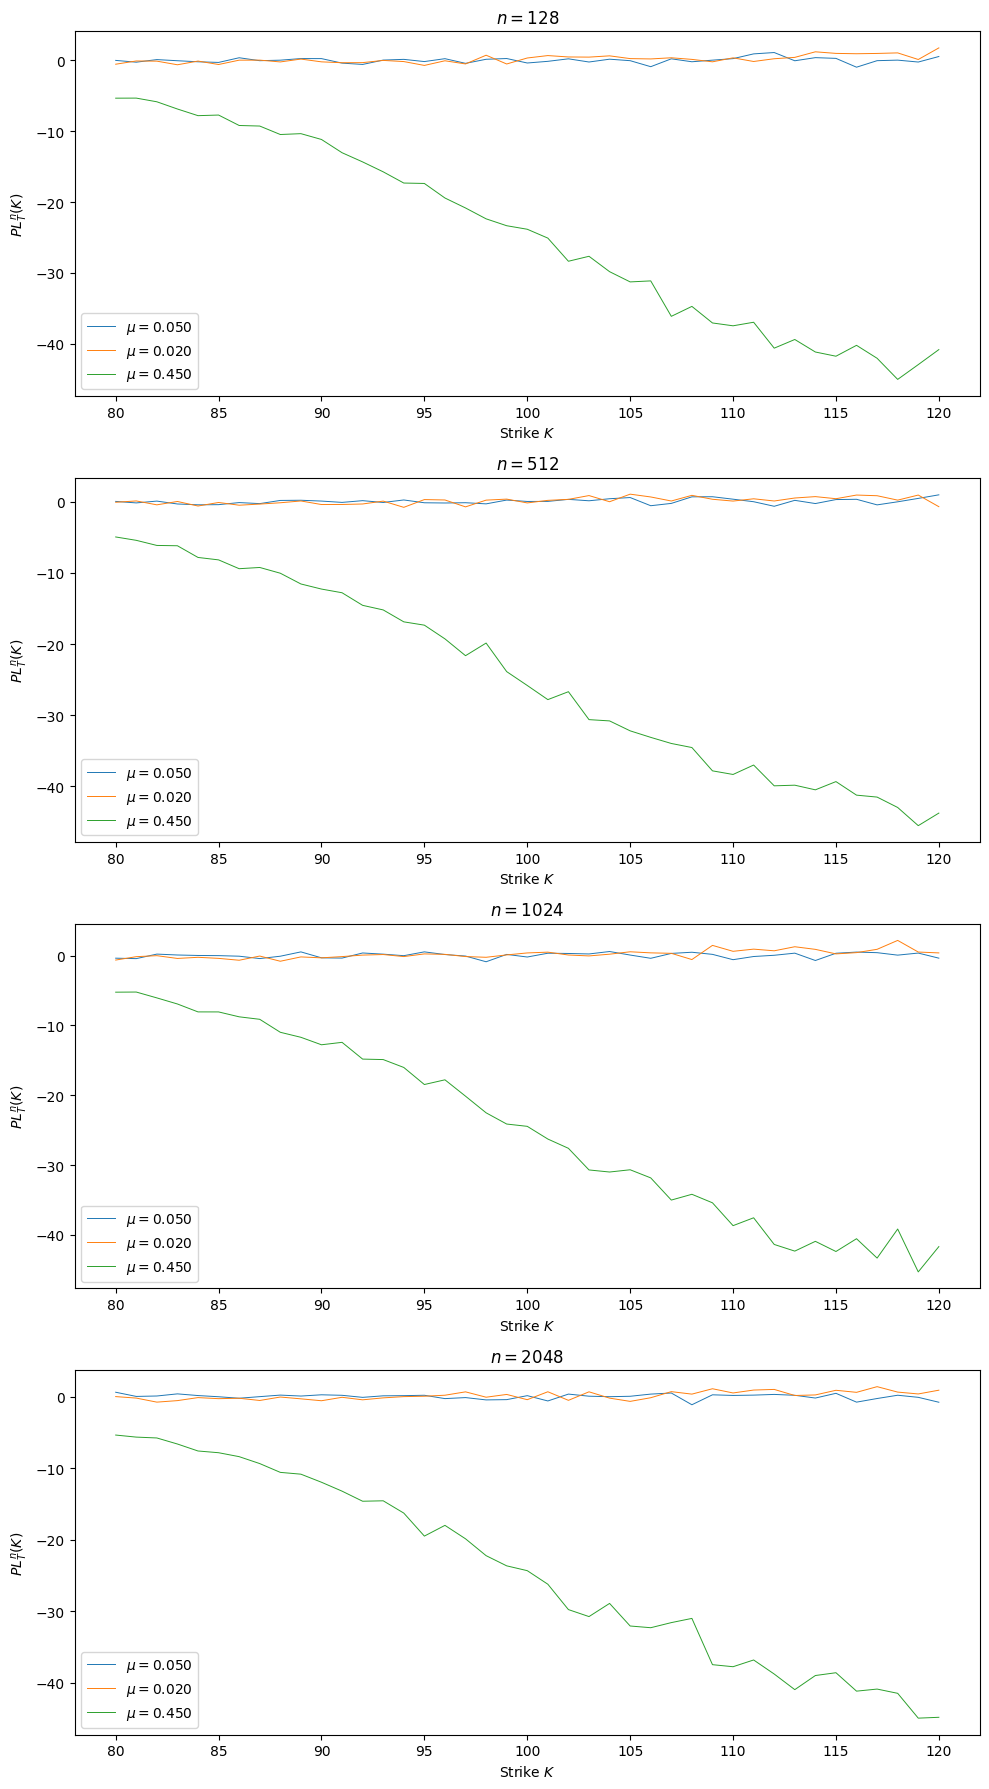

In [42]:
fig, axes = plt.subplots(len(n_val_list),1,figsize=(10,18),dpi=100)

for i, n in enumerate(n_val_list):
    for j, mu in enumerate(mu_val_list):
        axes[i].plot(
            K_val_list, mean_matrix[i,:,j],
            linestyle='-', label=r"$\mu=%.3f$" % mu, linewidth=0.7)
    axes[i].set_xlabel("Strike $K$")
    axes[i].legend()
    axes[i].set_title(r"$n=%d$" % n)
    axes[i].set_ylabel("$PL_T^n(K)$")
fig.tight_layout()

**Comments:** We can see that the $PnL$ results obtainted with $\mu = 0.450$ are quite far from those obtained with smaller values of $μ$.

## Variance of the Profit-Loss

Let's now compute and plot the variance of the profit loss

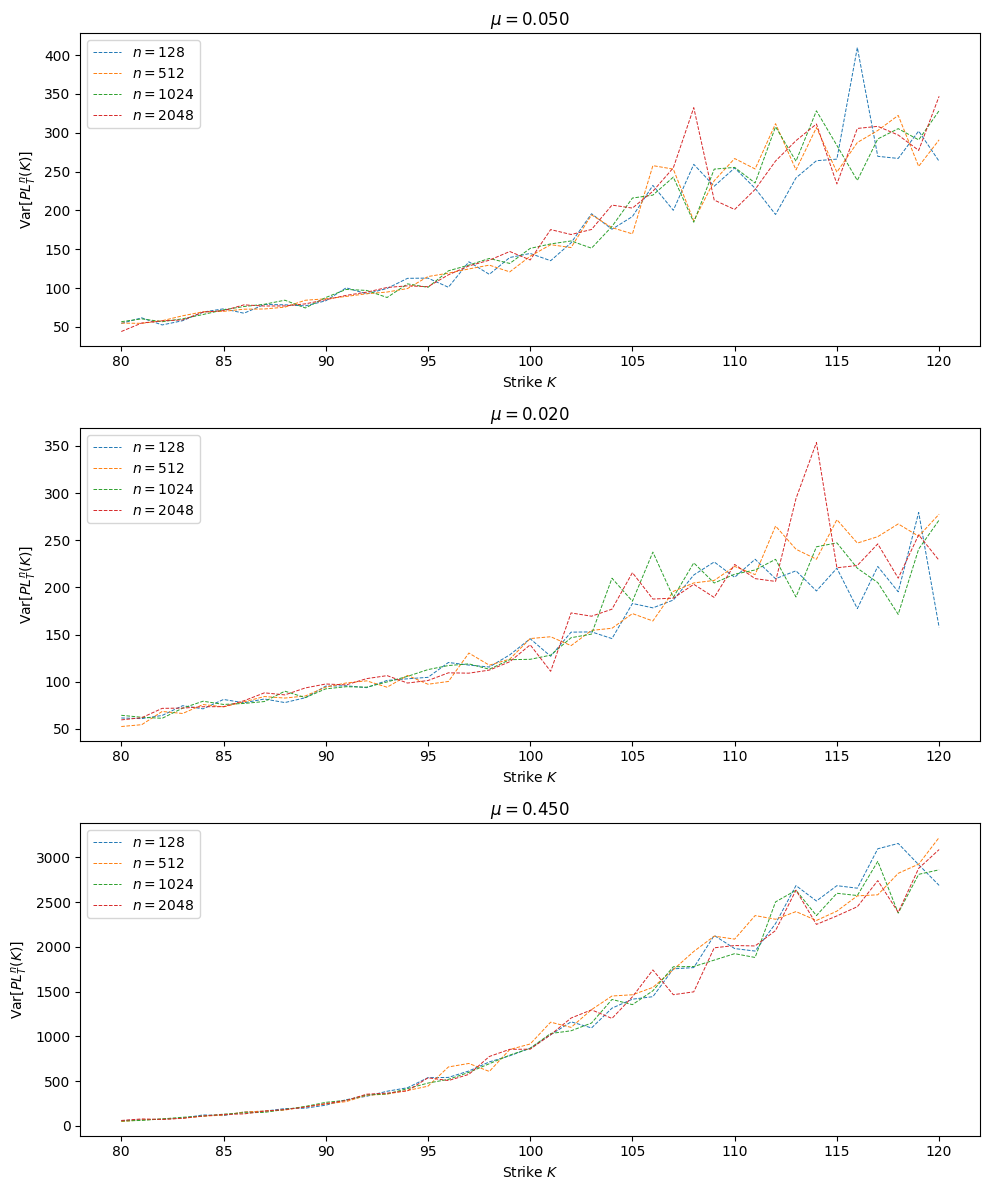

In [43]:
fig, axes = plt.subplots(3,1,figsize=(10,12),dpi=100)

for i, mu in enumerate(mu_val_list):
    for j, n in enumerate(n_val_list):
        axes[i].plot(
            K_val_list, var_matrix[j,:,i],
            linestyle='--', label=r"$n=%d$" % n, linewidth=0.7)
    axes[i].set_xlabel("Strike $K$")
    axes[i].legend()
    axes[i].set_title(r"$\mu=%.3f$" % mu)
    axes[i].set_ylabel(r"$\mathrm{Var}[PL_T^n(K)]$")
fig.tight_layout()

**Comments:** From the plots above, we can conclude that for a high value of $n$, when $μ$ is small, the variation curve of the variance as a function of the strike is more erratic. However, by increasing the value of $\mu$, the opposite occurs and we obtain a more regular curve for the greater value of $n$.

As shown before, we can observe an increasing value of the variance of the $PnL$ with the value of $μ$.